In [748]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [749]:
# Loading the dataset
df = pd.read_csv("glassdoor_jobs.csv")

# **Exploring Dataset**

In [750]:
df.shape

(956, 15)

In [751]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [752]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [753]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


_**Note:** No feature has NaN values, but there may be the case where the NaN values are replaced by some other value(s) like -1, 0, etc._

In [755]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


_**Note:** NaN values are replace by -1 in numeric features._

# **Exploratory Data Analysis & Data Cleaning**
* Plotting bargraphs and countplots for numerical and categorical features respectively.
* Removing unwanted columns
* Handling NaN/missing values
* Removing unwanted alphabet/special characters from the features

In [756]:
# Removing unwanted column
print('Shape before removing: {}'.format(df.shape))
df.drop(labels=['Unnamed: 0'], axis='columns', inplace=True)
print('Shape after removing: {}'.format(df.shape))

Shape before removing: (956, 15)
Shape after removing: (956, 14)


In [757]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


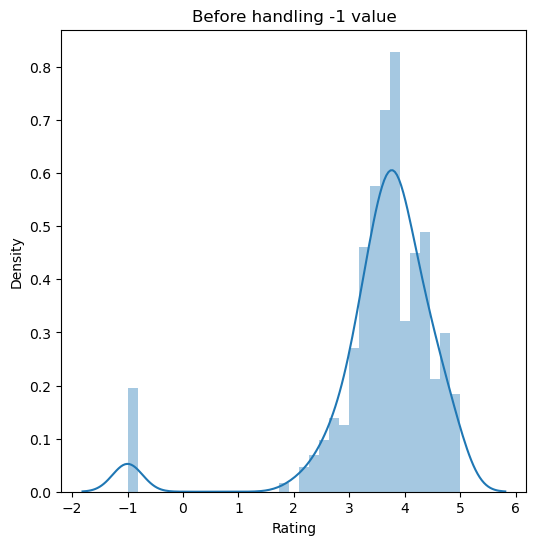

In [758]:
# Visualising Rating column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Before handling -1 value')

_**Note: Since the Rating feature follows the Gaussian/Normal Distribution**, we'll replace -1 values with mean of the distribution._

/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


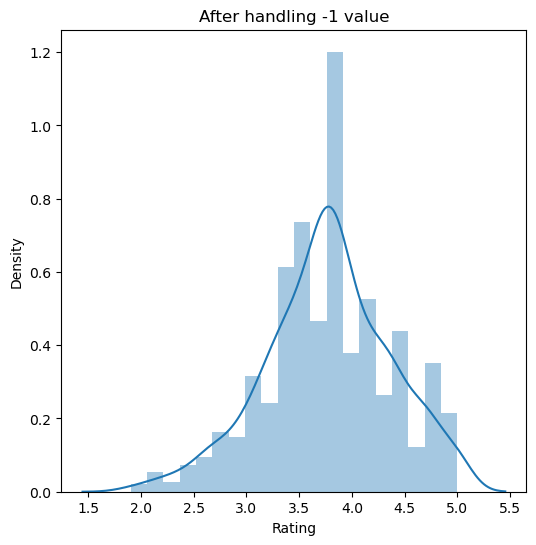

In [759]:
# Handling -1 values in Rating column
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('After handling -1 value')

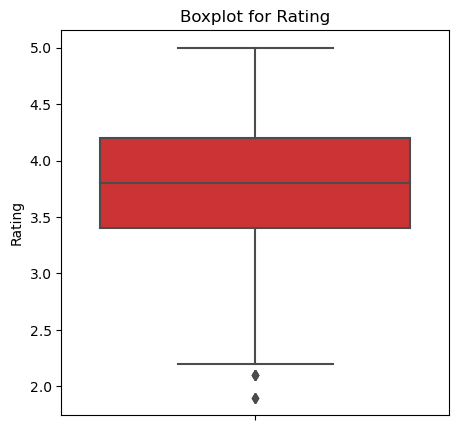

In [760]:
# Outliers in Rating
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Rating')
p = plt.ylabel('Rating')

/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


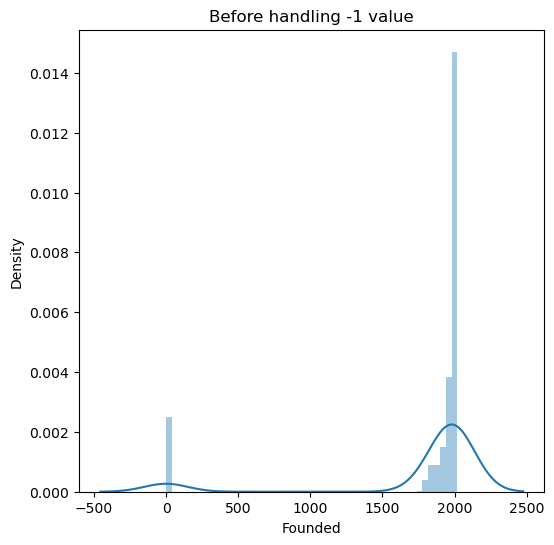

In [761]:
# Visualising Founded column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('Before handling -1 value')

_**Note: Since Founded feature does not follow Gaussian/Normal distribution but is Right-Skewed graph**, we'll replacing the -1 values with median of the distribution._

/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


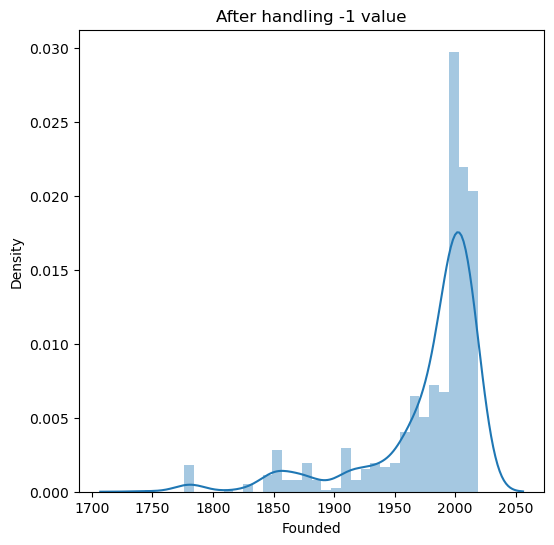

In [762]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('After handling -1 value')

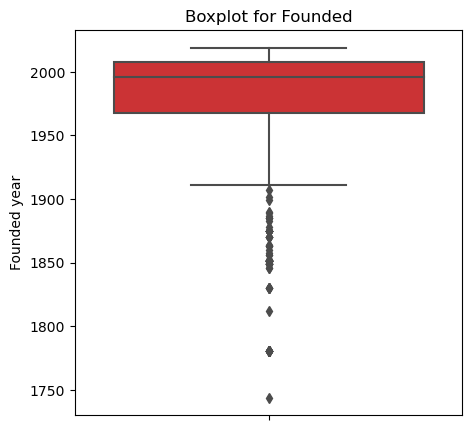

In [763]:
# Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Founded')
p = plt.ylabel('Founded year')

In [764]:
# Cleaning Job Title column
df['Job Title'].value_counts().nlargest(20)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [765]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['job_title'] = df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: job_title, dtype: int64

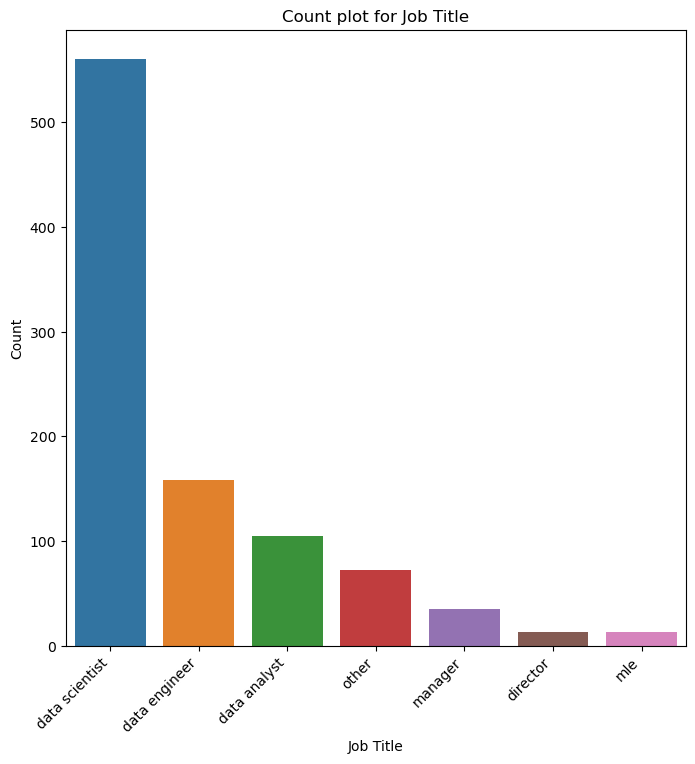

In [766]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [767]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

other    701
sr       252
jr         3
Name: job_seniority, dtype: int64

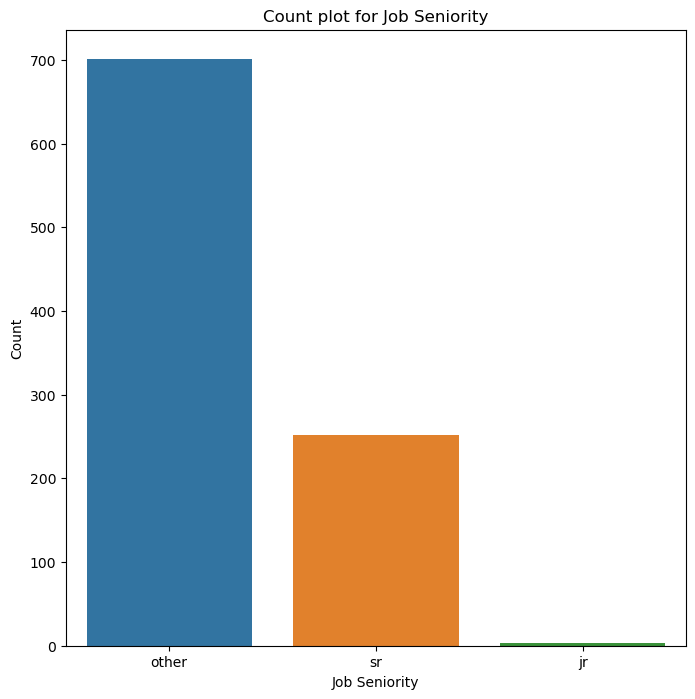

In [768]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [769]:
# Removing Job Title column
df.drop(labels=['Job Title'], axis=1, inplace=True)

In [770]:
# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [771]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [772]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [773]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [774]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

_**Note:** **Converting per hour salaries to per year salaries** (assuming 45 work hours per week and 52 working weeks), and removing **employer_provided_salary** from the salary array._

In [775]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [776]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


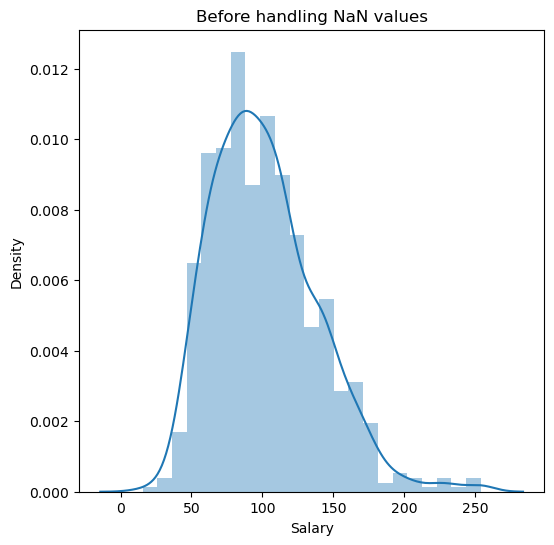

In [777]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Before handling NaN values')

_**Note: Since the Rating feature follows the Gaussian/Normal Distribution**, but since there are few outlies, we'll replace -1 values with median of the distribution._

/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


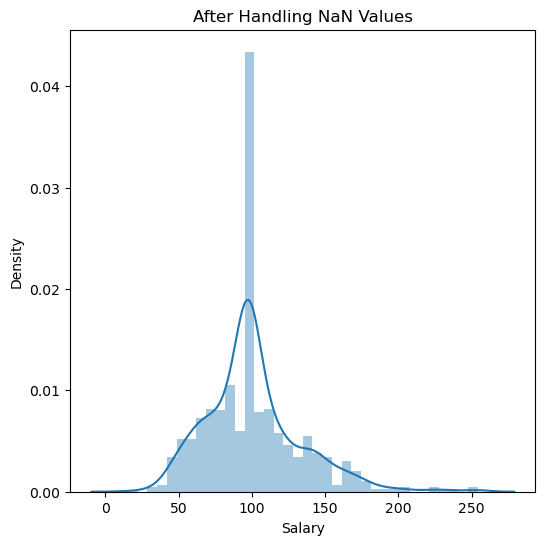

In [778]:
# Handling NaN values in Salary column 
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('After Handling NaN Values')

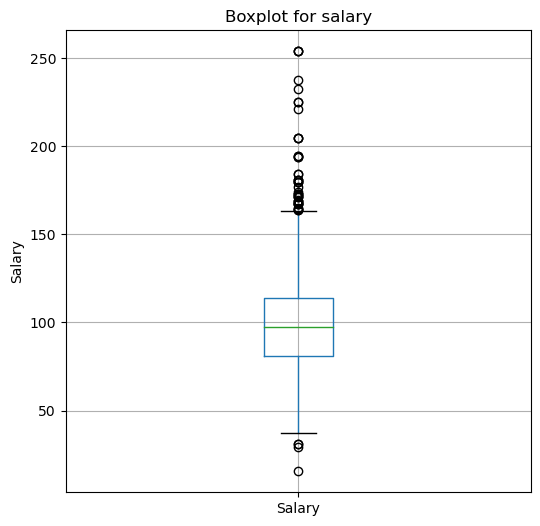

In [779]:
# Outliers in Salary
plt.figure(figsize=(6,6))
df.boxplot('Salary')
p = plt.title('Boxplot for salary')
p = plt.ylabel('Salary')

In [780]:
# Cleaning Company Name column
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])

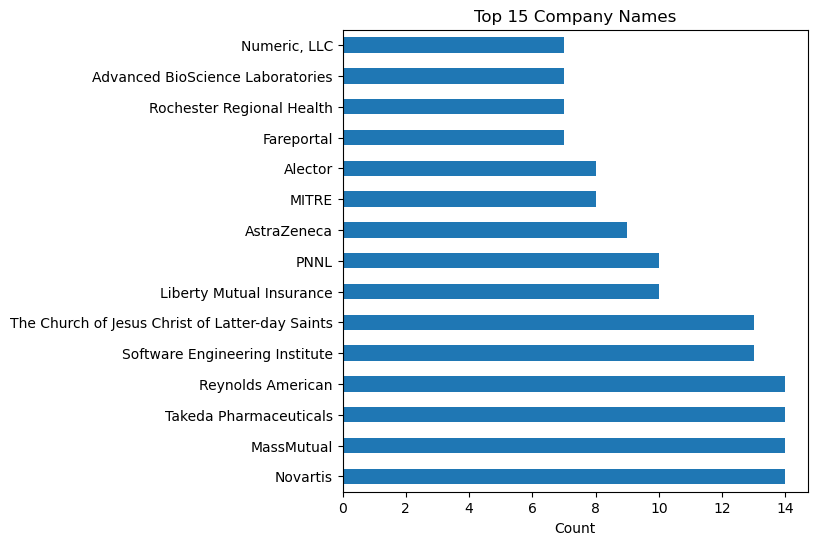

In [781]:
plt.figure(figsize=(6,6))
g = df['Company Name'].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [782]:
# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1])
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 46


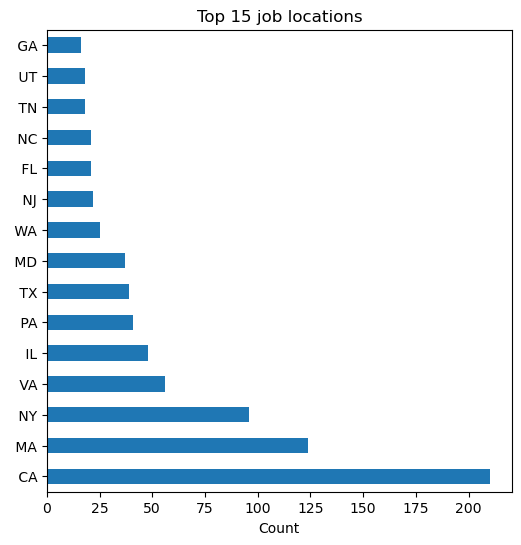

In [783]:
plt.figure(figsize=(6,6))
g = df['job_location'].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 job locations')
p = plt.xlabel('Count')

In [784]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [785]:
#Cleaning size column
def size_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown'
    else:
        return text
    
df['Size'] = df['Size'].apply(size_simplifier)

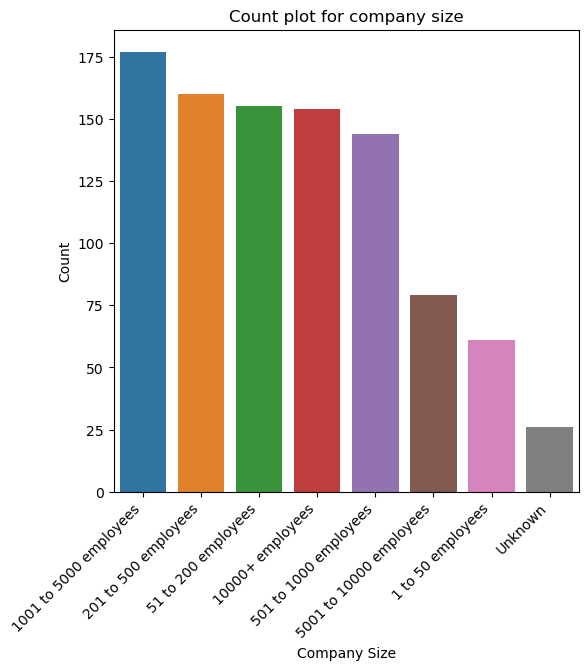

In [786]:
plt.figure(figsize=(6,6))
g = sns.countplot(x = 'Size', data = df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for company size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [787]:
# Cleaning Type of ownership column
df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [788]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()):
        return 'Other Organization'
    else:
        return text
df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)


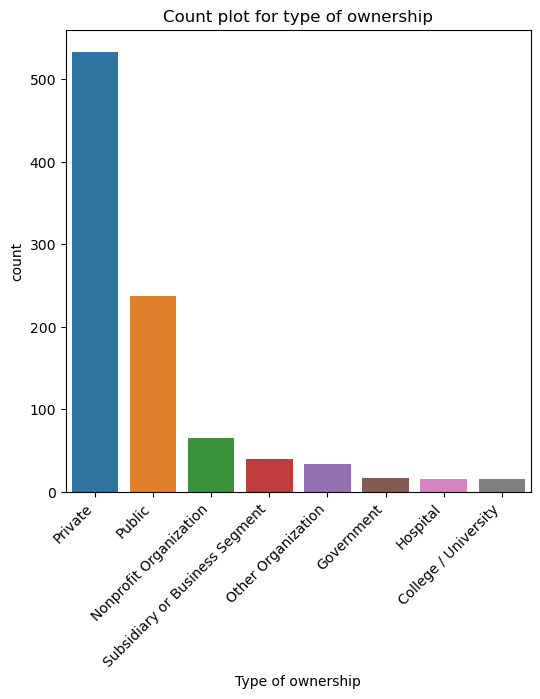

In [789]:
plt.figure(figsize=(6,6))
g = sns.countplot(x = 'Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [790]:
# Cleaninf Indistry column
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [791]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

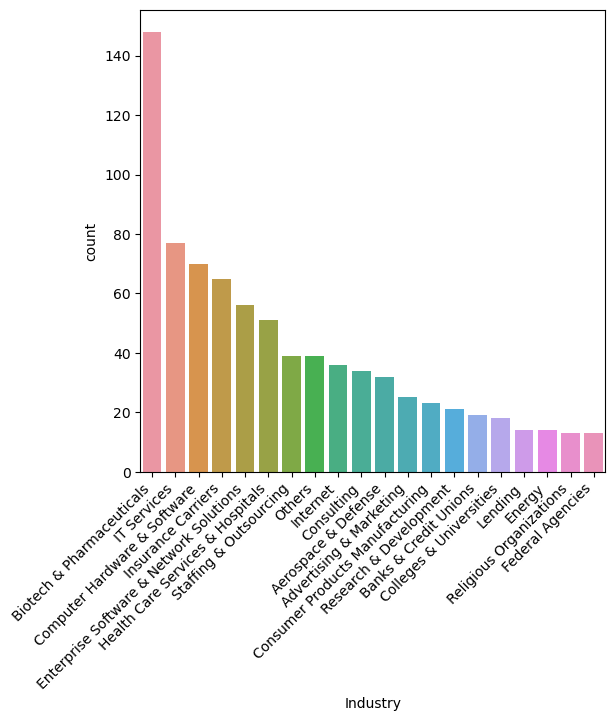

In [792]:
plt.figure(figsize=(6,6))
g = sns.countplot(x = 'Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = g.set_xticklabels(g.get_xticklabels(), rotation =45, horizontalalignment='right')

In [793]:
# Cleaning 'Sector' column
df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [794]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

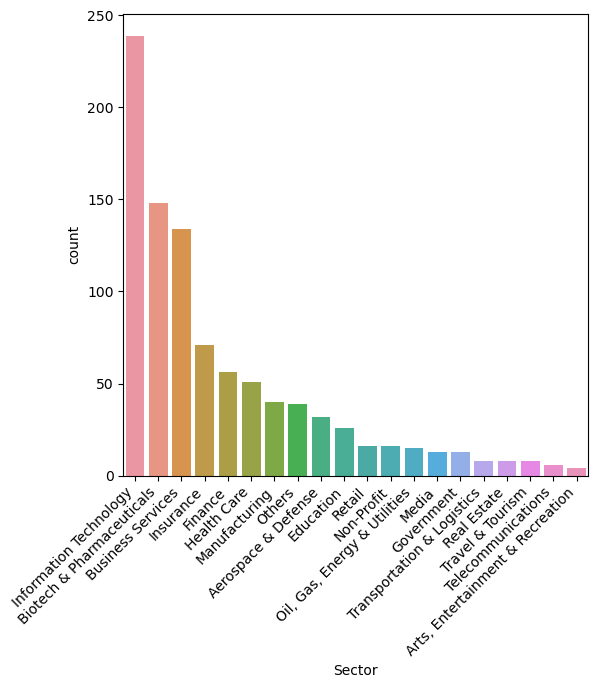

In [795]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [796]:
# Cleaning 'Revenue' Column
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [797]:
def revenue_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown / Non-Applicable'
    else:
        return text
    
df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

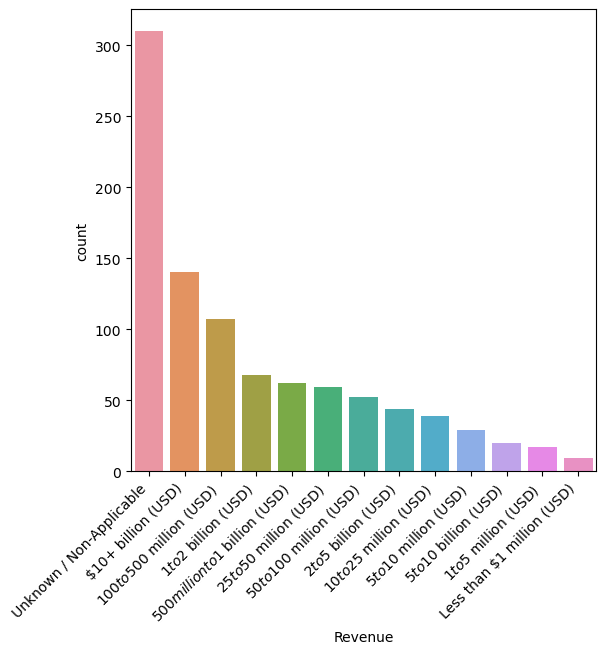

In [798]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='Revenue',data=df,order=df['Revenue'].value_counts().index)
p = g.set_xticklabels(g.get_xticklabels(),rotation=45, horizontalalignment='right')

In [799]:
# Cleaning 'Competitors' column
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
954                                               Slalom
955                                                   -1
Name: Competitors, Length: 956, dtype: object

In [800]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)

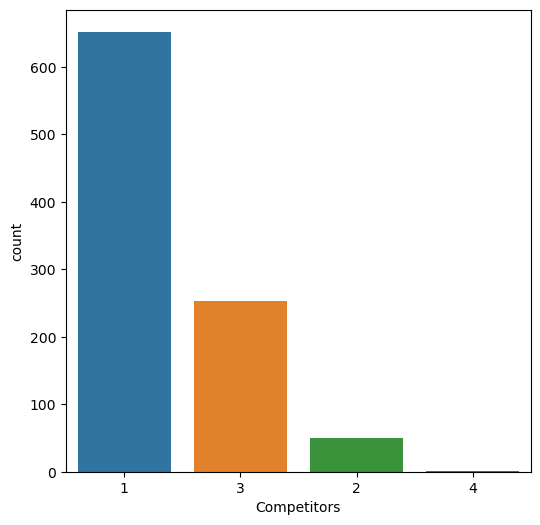

In [801]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='Competitors',data=df,order=df['Competitors'].value_counts().index)

In [802]:
# Dataset till now
df

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,data scientist,other,72.0,NM
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,data scientist,other,87.5,MD
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),1,data scientist,other,85.0,FL
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,other,76.5,WA
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,other,114.5,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Public,Internet,Information Technology,$100 to $500 million (USD),3,data engineer,sr,102.5,TN
952,$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,1,data scientist,other,73.5,PA
953,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,1996,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),1,manager,other,127.5,PA
954,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,"Austin, TX","Portland, OR",201 to 500 employees,2015,Private,IT Services,Information Technology,$25 to $50 million (USD),1,data engineer,other,97.5,TX


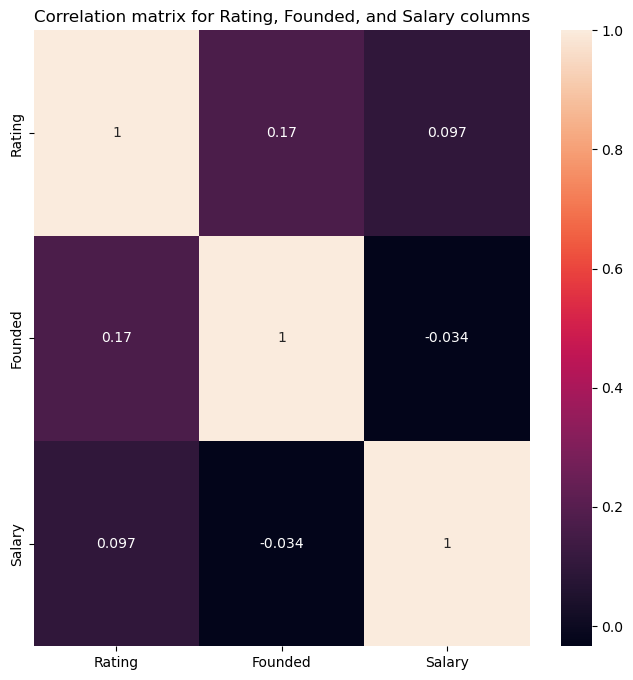

In [803]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

g = sns.heatmap(corr,annot=True)
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

Insight: Rating-Founded columns have positive correlation, whereas Salary-Founded columns have negative correlation. Also since the correlation is not high amongst all these numerical features, there is no case of multicolliniearity.

# Feature Engineering
1. Creating new features from existing features
2. Trimming Columns
3. Handling ordinal and nominal categorical features
4. Feature Selection

## Creating new features from existing features
1. Adding column of job_in_headquarters
2. Adding columns of python,excel,sql,tableau jobs

In [804]:
# Creating column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0,axis=1)

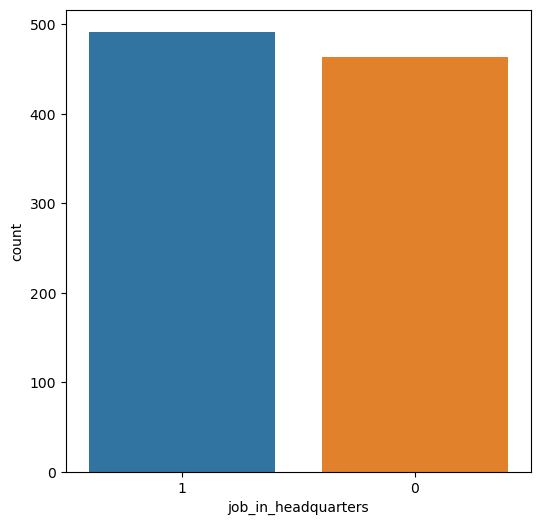

In [805]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='job_in_headquarters',data=df,order = df['job_in_headquarters'].value_counts().index)


In [806]:
df.drop(labels=['Location'],axis=1,inplace=True)

In [807]:
# Creating columns of python ,excel, sql, tableau jobs

df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

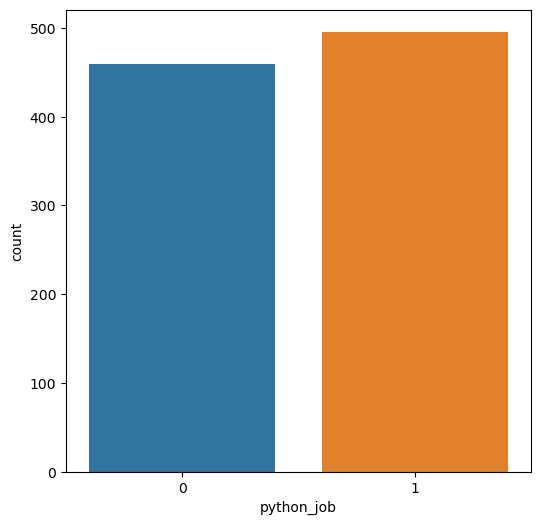

In [808]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='python_job',data=df)

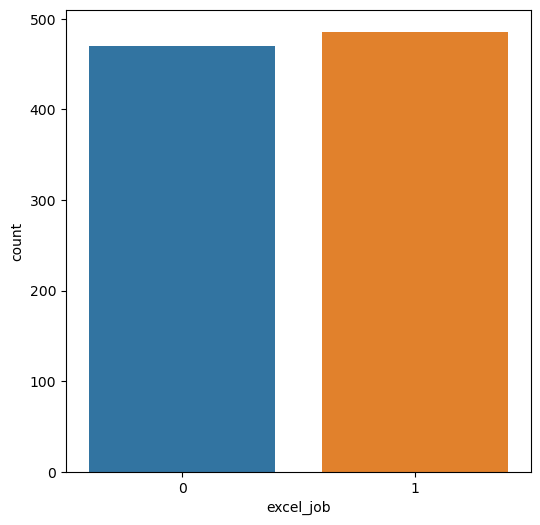

In [809]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='excel_job',data=df)

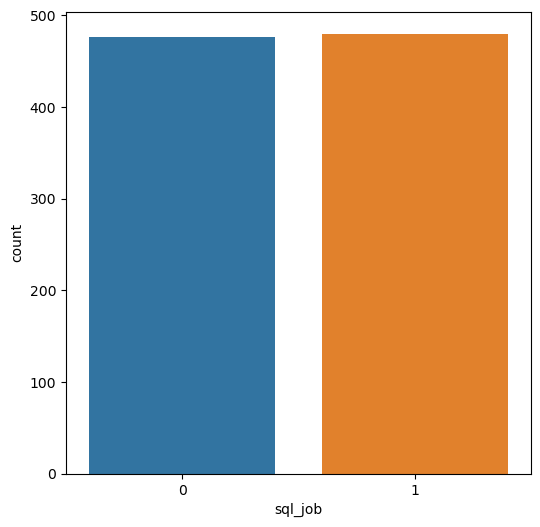

In [810]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='sql_job',data=df)

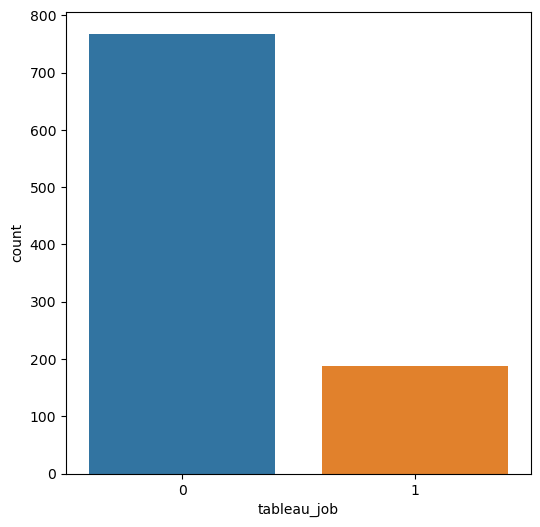

In [811]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='tableau_job',data=df)

In [812]:
df.drop(labels=['Job Description'],axis=1,inplace=True)

### Trimming Columns
Features having more than 10 categories are trimmed so as to reduce the dimensionality

In [813]:
# Trimming the 'Sector' column
# Taking top 9 sectors and replacing remaining by 'Others'

sector_list = list(df['Sector'].value_counts()[:10].index)

def trim_sector(text):
    if text not in sector_list:
        return 'Others'
    else:
        return text
    
df['Sector'] = df['Sector'].apply(trim_sector)

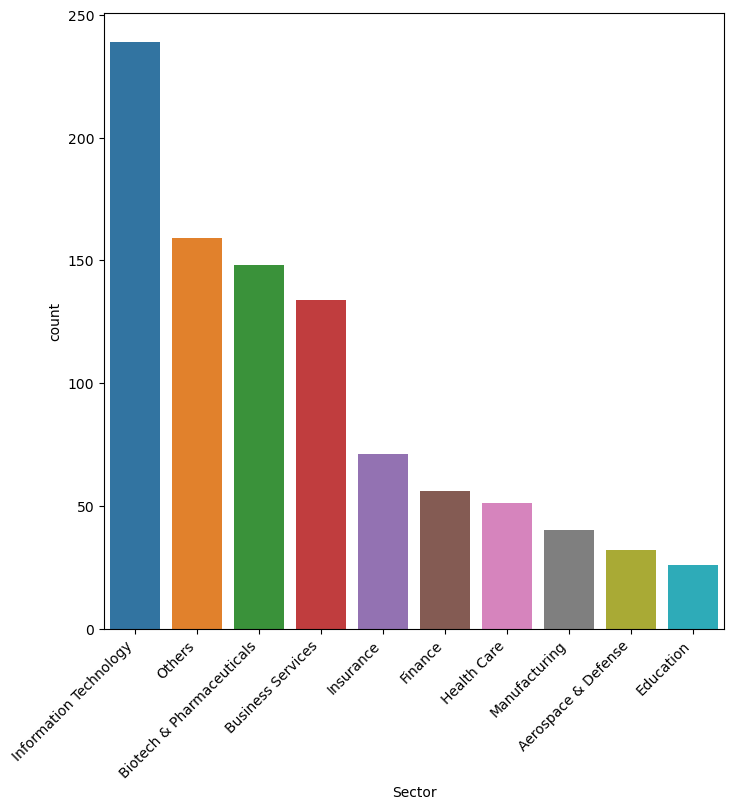

In [814]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector',data=df,order=df['Sector'].value_counts().index)
p = g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')

In [815]:
# Trimming the 'job_location' column
# Taking top 9 and replacing others by Others

job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_trim(text):
    if text not in job_location_list:
        return 'Others'
    else:
        return text
    
df['job_location'] = df['job_location'].apply(job_location_trim)

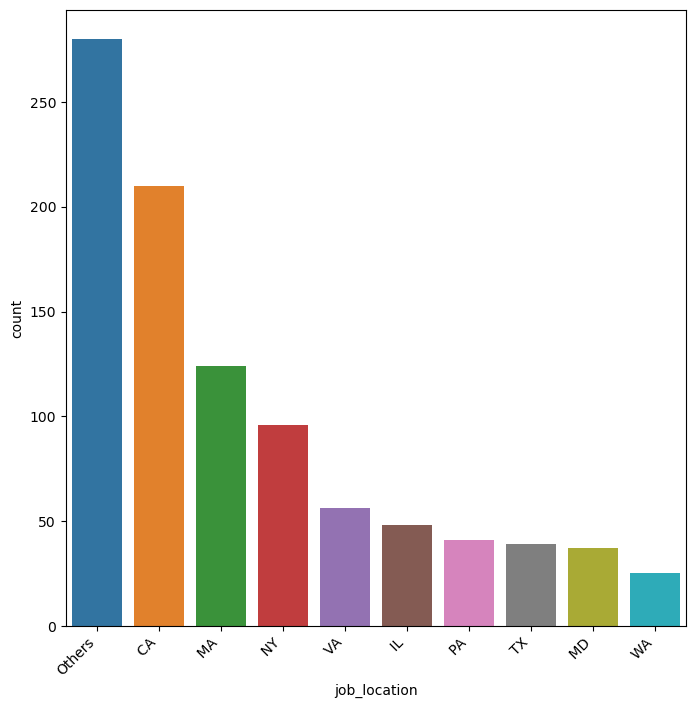

In [816]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location',data=df,order=df['job_location'].value_counts().index)
p = g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')

In [817]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [818]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [819]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

In [820]:
df.columns

Index(['company_rating', 'company_size', 'company_founded',
       'type_of_ownership', 'sector', 'revenue', 'competitors', 'job_title',
       'job_seniority', 'salary', 'job_in_headquarters', 'python_job',
       'excel_job', 'sql_job', 'tableau_job'],
      dtype='object')

### Handling ordinal categorical features
ordinal features are categrical varibles that have some order associated with them (e.g size,rating,remark, etc.)

In [821]:
df['company_size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown'], dtype=object)

In [822]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown':0,'1 to 50 employees':1,'51 to 200 employees':2,'201 to 500 employees':3,'501 to 1000 employees':4,'1001 to 5000 employees':5,'5001 to 10000 employees':6,'10000+ employees':7}

df['company_size'] = df['company_size'].map(size_map)

In [823]:
df['revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [824]:
# Mapping ranks to 'revenue' column
revenue_map = {'Unknown / Non-Applicable':0,
               'Less than $1 million (USD)':1,
               '$1 to $5 million (USD)':2,
               '$5 to $10 million (USD)':3,
               '$10 to $25 million (USD)':4,
               '$25 to $50 million (USD)':5,
               '$50 to $100 million (USD)':6,
               '$100 to $500 million (USD)':7,
               '$500 million to $1 billion (USD)':8,
               '$1 to $2 billion (USD)':9,
               '$2 to $5 billion (USD)':10,
               '$5 to $10 billion (USD)':11,
               '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [825]:
df['job_seniority'].unique()

array(['other', 'sr', 'jr'], dtype=object)

In [826]:
# Mapping ranks to job_seniority column
seniority_map = {'other':0,'jr':1,'sr':2}

df['job_seniority'] = df['job_seniority'].map(seniority_map)

### Handling nominal categorical features
Nominal features are categorical variables that have no numerical importance(e.g. occupation,name,etc)

In [827]:
df['type_of_ownership'].unique()

array(['Private', 'Other Organization', 'Government', 'Public',
       'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'College / University'], dtype=object)

In [828]:
# Removing type_of_ownership column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'],data = df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (956, 15)
After: (956, 22)


In [829]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df= pd.get_dummies(columns=['sector'],data=df)
print('After: {}'.format(df.shape))

Before: (956, 22)
After: (956, 31)


In [830]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'],data=df)
print('After: {}'.format(df.shape))

Before: (956, 31)
After: (956, 37)


In [831]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

### Feature Selection
Selecting features based on information gain(mutual_info_regression) and correlation matrix

In [832]:
X = df.drop('salary',axis=1)
y = df['salary']

In [833]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


In [841]:
fs = SelectKBest(score_func=mutual_info_regression, k ='all')
fs.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7fba72f47b80>)

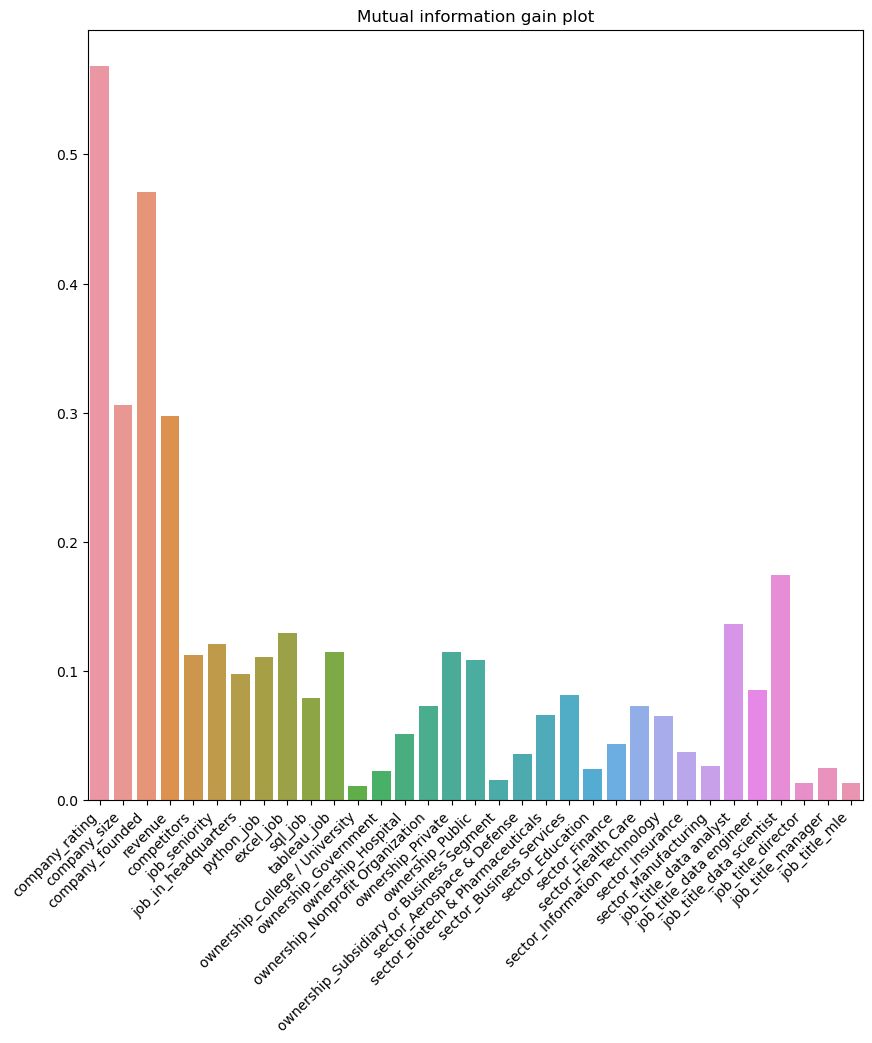

In [845]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual information gain plot')
p = g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')

Insight: From feature importance chart, it is evident that there are atleast 20 features that impact the target variable.

In [846]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

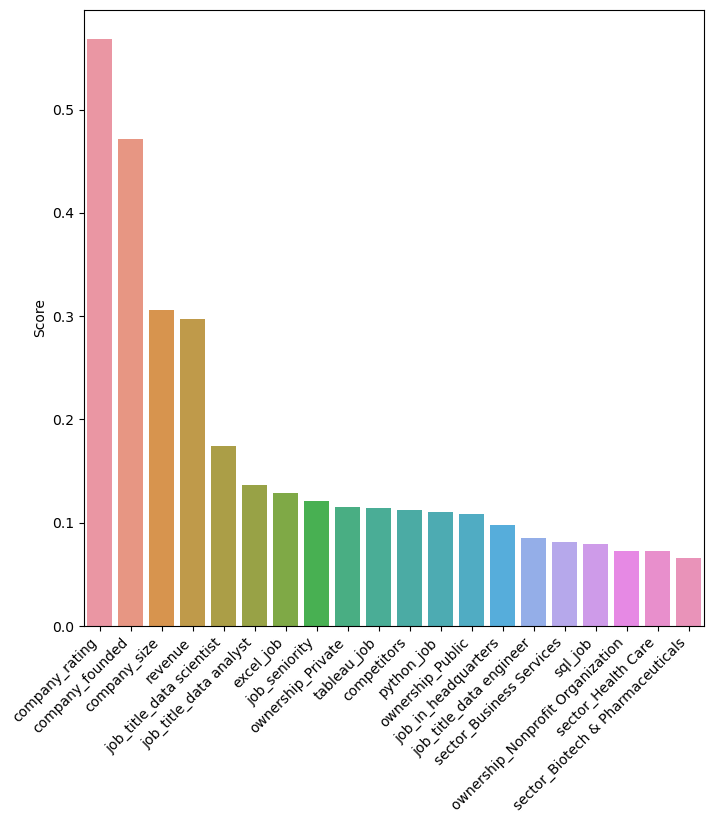

In [850]:
plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')

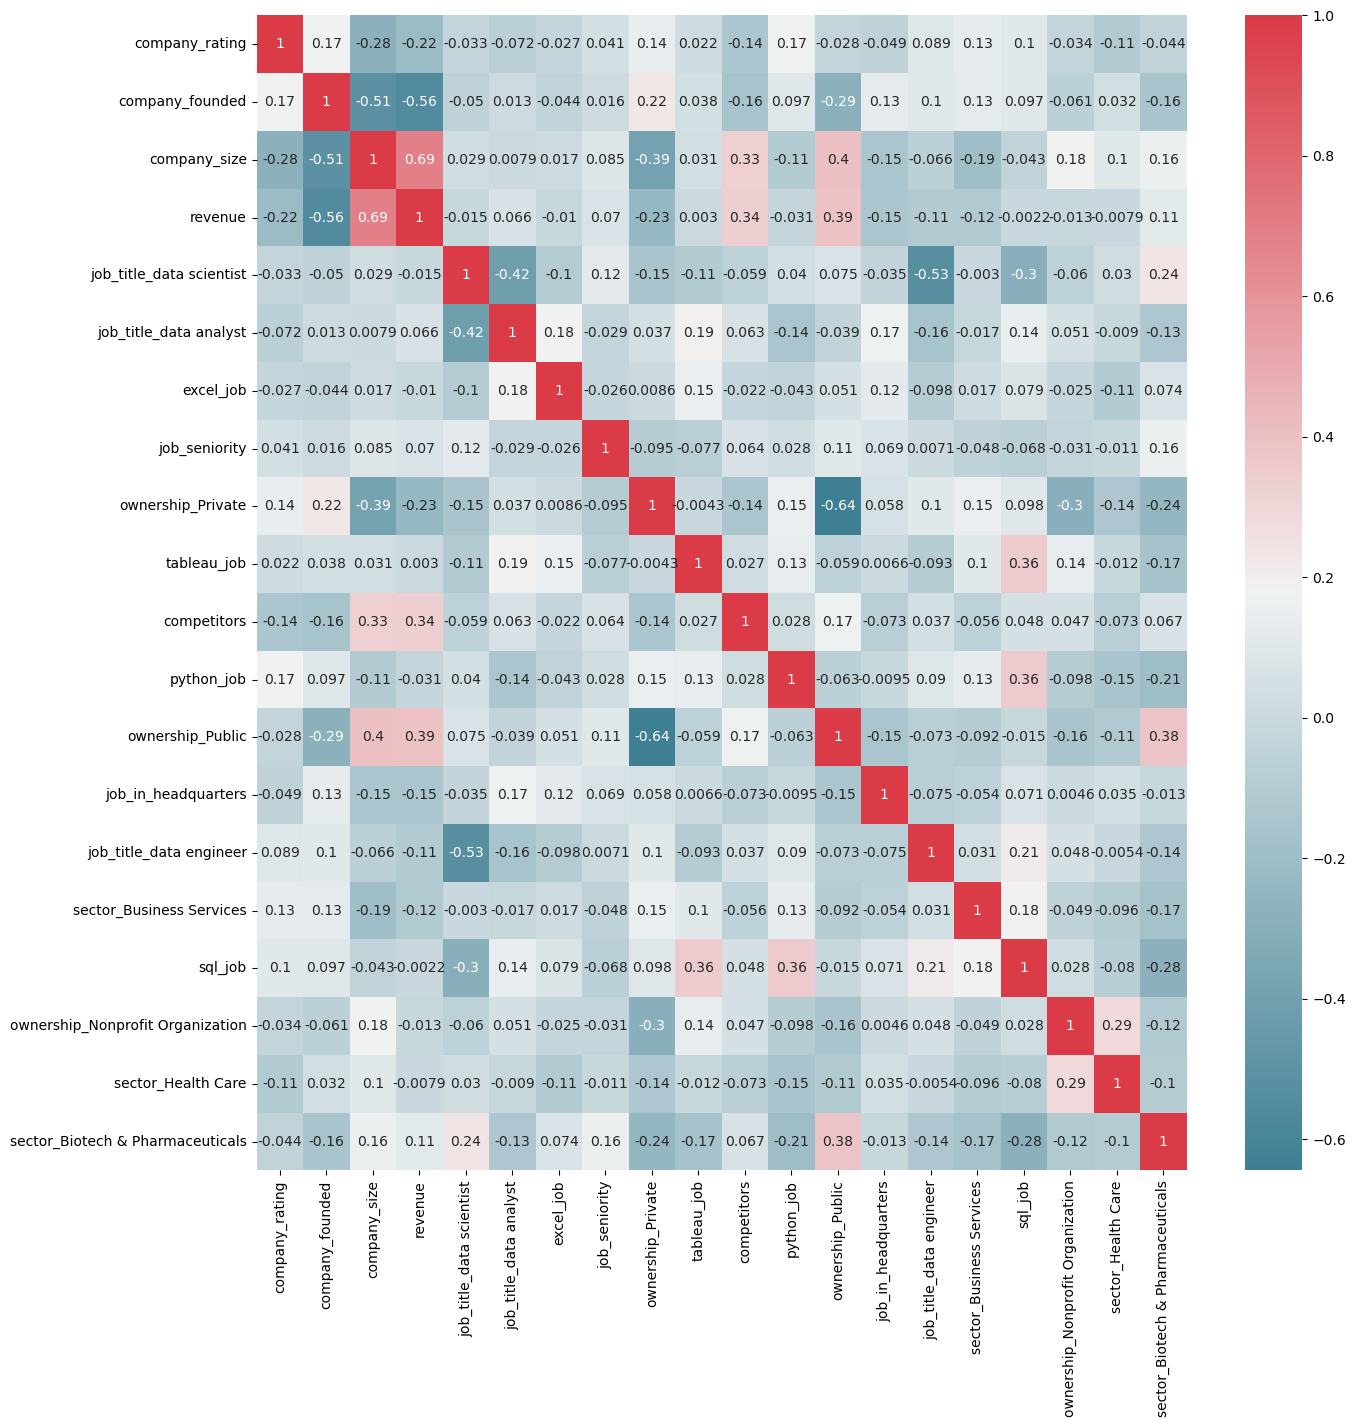

In [854]:
# Finding and plotting correlation for top 20 features

cmap = sns.diverging_palette(220,10, as_cmap=True)
corr = X[top20_feature.index].corr()
plt.figure(figsize=(15,15))

g = sns.heatmap(corr, annot=True, cmap=cmap)

Range of correlation are as follows:

Strong correlation: X > 0.7
Moderate correlation: 0.5 < X < 0.7
Weak correlation: X < 0.5

Insight: From the correlation matrix, it is evident that features (ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated. Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features.

In [855]:
X = X[top20_feature.index]
X.drop(labels=['revenue', 'ownership_Public', 'job_title_data engineer', 'company_size'],axis=1,inplace=True)

/var/folders/xv/bfp9l0mx0xq5gyct21f9rhdw0000gq/T/ipykernel_56633/3589869838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(labels=['revenue', 'ownership_Public', 'job_title_data engineer', 'company_size'],axis=1,inplace=True)


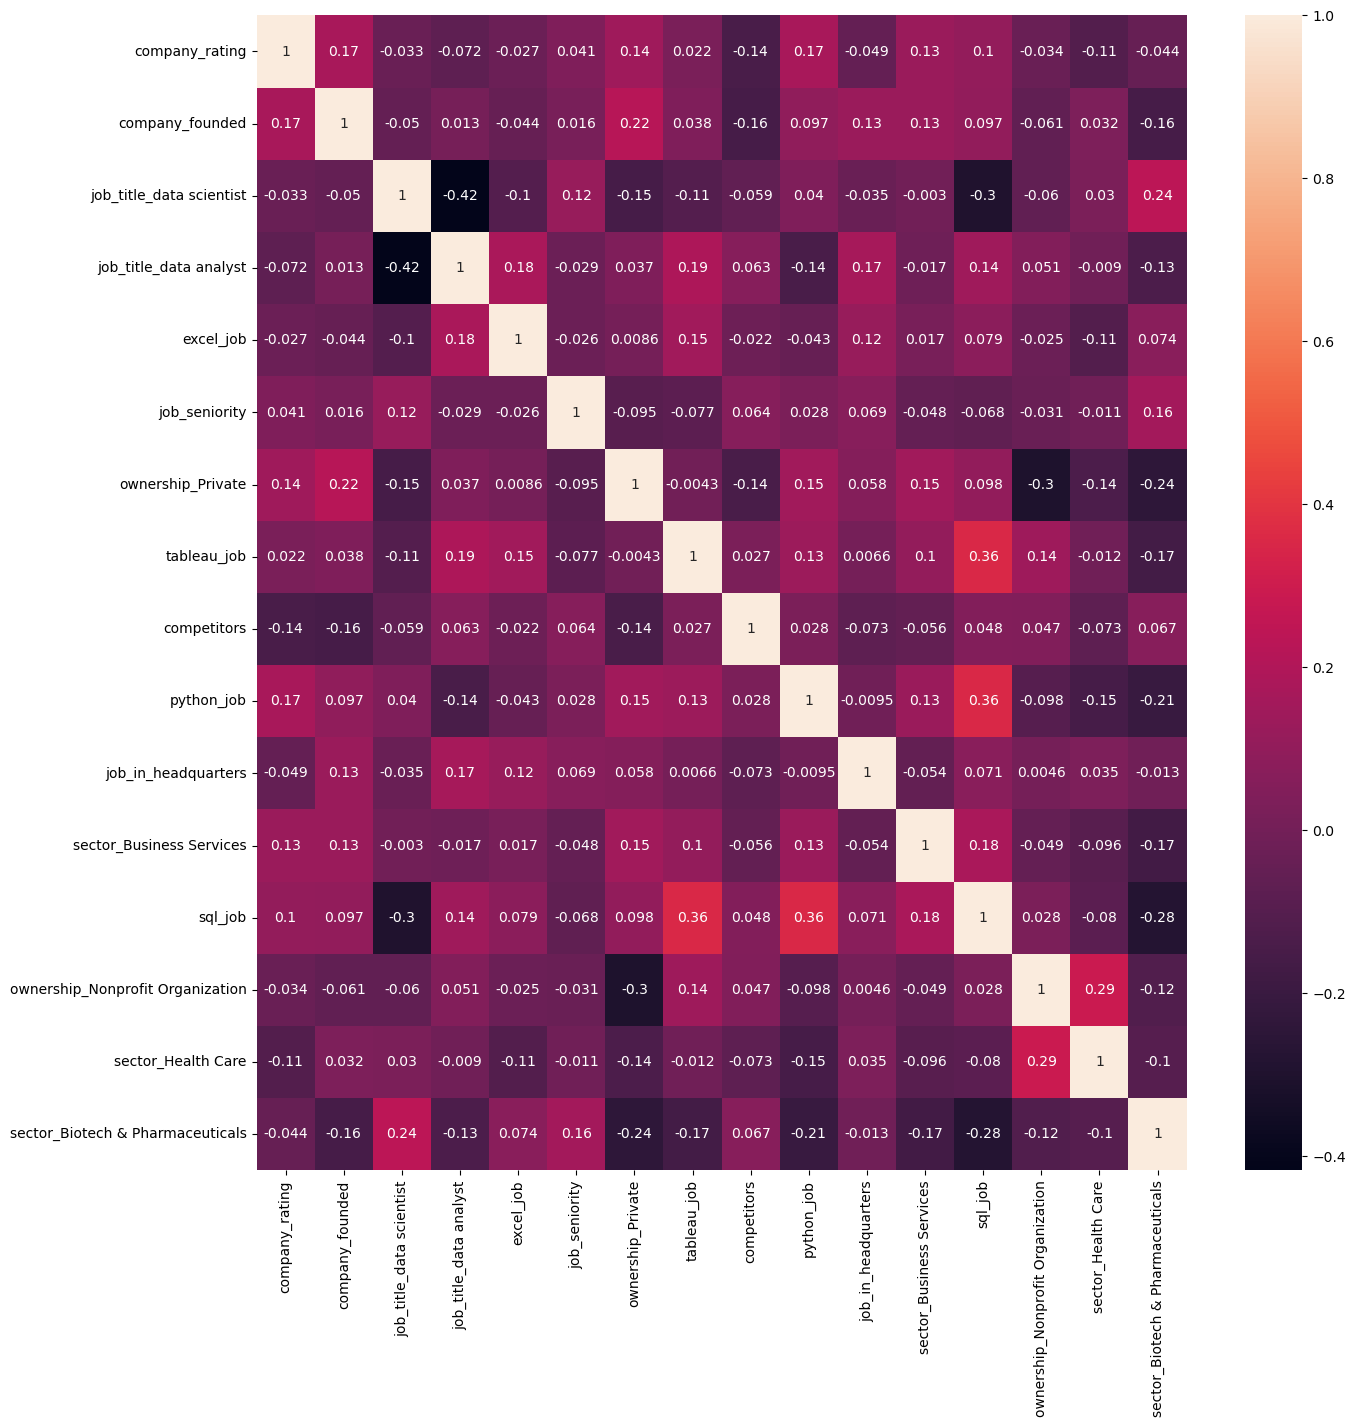

In [857]:
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(15,15))
corr = X.corr()

g = sns.heatmap(corr,annot=True)

In [858]:
X.columns

Index(['company_rating', 'company_founded', 'job_title_data scientist',
       'job_title_data analyst', 'excel_job', 'job_seniority',
       'ownership_Private', 'tableau_job', 'competitors', 'python_job',
       'job_in_headquarters', 'sector_Business Services', 'sql_job',
       'ownership_Nonprofit Organization', 'sector_Health Care',
       'sector_Biotech & Pharmaceuticals'],
      dtype='object')

In [860]:
# Rearranging the columns

X = X[['company_rating', 'company_founded', 'competitors',
       'sector_Health Care', 'sector_Business Services',
       'ownership_Private', 'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

### Feature Scaling
Scaling features using StandardScaler library

In [861]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,3.8,1973,1,0,0,1,0,1,0,0,0,1,1,1,0
1,3.4,1984,1,1,0,0,0,1,0,0,0,0,1,0,0
2,4.8,2010,1,0,1,1,0,1,0,0,1,1,1,0,1
3,3.8,1965,3,0,0,0,0,1,0,0,1,0,1,0,0
4,2.9,1998,3,0,1,1,0,1,0,0,1,1,1,0,1


In [862]:
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

/var/folders/xv/bfp9l0mx0xq5gyct21f9rhdw0000gq/T/ipykernel_56633/2347235590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])
/var/folders/xv/bfp9l0mx0xq5gyct21f9rhdw0000gq/T/ipykernel_56633/2347235590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])


/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


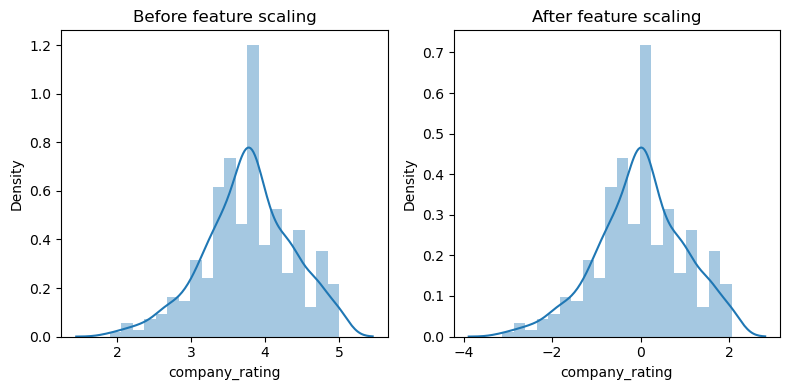

In [870]:
# Plotting company_rating before and after feature scaling
plt.figure(figsize=(8,4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1,2,1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before feature scaling')

# 1-row, 2-column, go to the secong subplot
plt.subplot(1,2,2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After feature scaling')

plt.tight_layout()
plt.show()

Insight: Feature Scaling doesnot change the distribution of the data, it only reduces the scale of that particular feature.

In [871]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,0.048588,-0.086728,1,0,0,1,0,1,0,0,0,1,1,1,0
1,-0.620043,0.138799,1,1,0,0,0,1,0,0,0,0,1,0,0
2,1.720165,0.671863,1,0,1,1,0,1,0,0,1,1,1,0,1
3,0.048588,-0.250748,3,0,0,0,0,1,0,0,1,0,1,0,0
4,-1.455831,0.425833,3,0,1,1,0,1,0,0,1,1,1,0,1


# Model Building and Evaluvation

Metric: Normalised Root Mean Squared Error (NRMSE)

1. Multiple Linear Regression: -27.523 NRMSE
2. Lasso Regression (L1 Regularization): -27.993 NRMSE
3. Random Forest (Ensemble): -17.637 NRMSE
4. Gradient Boosting: -24.429 NRMSE
5. Voting (Random Forest + Gradient Boosting): -19.136 NRMSE

In [872]:
from sklearn.model_selection import cross_val_score

In [873]:
# Fitting multiple linear regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(),3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.808 ---
Standard Deviation: 2.17


In [876]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso,X,y,cv=10,scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(),3)))
print('Standard Deviation: {}'.format(round(cv.std(),3)))

--- Average NRMSE: -28.234 ---
Standard Deviation: 1.72


In [877]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf,X,y,cv=10,scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(),3)))
print('Standard Deviation: {}'.format(round(cv.std(),3)))

--- Average NRMSE: -17.965 ---
Standard Deviation: 5.576


In [878]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -24.795 ---
Standard Deviation: 2.335


In [879]:
# Fitting Random Forest and Gradient Boosting to Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -19.324 ---
Standard Deviation: 4.301


Note: Voting algorithm too did not perform well as compared to Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.

In [887]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [888]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):
    prediction_input = list()
    prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
    prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
    prediction_input.append(competitors)


    sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                        'sector_Business Services']
    temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
    for index in range(0, len(sector_columns)):
        if sector_columns[index] == 'sector_' + sector:
            temp[index] = 1
            break
    prediction_input = prediction_input + temp


    if ownership == 'Private':
        prediction_input.append(1)
    else:
        prediction_input.append(0)


    job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
    temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
    for index in range(0, len(job_title_columns)):
        if job_title_columns[index] == 'job_title_' + job_title:
            temp[index] = 1
            break
    prediction_input = prediction_input + temp


    prediction_input.append(job_in_headquarters)


    job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
    prediction_input.append(job_seniority_map[job_seniority])


    temp = list(map(int, np.zeros(shape=(1, 4))[0]))
    if 'excel' in job_skills:
        temp[0] = 1
    if 'python' in job_skills:
        temp[1] = 1
    if 'tableau' in job_skills:
        temp[2] = 1
    if 'sql' in job_skills:
        temp[3] = 1
    prediction_input = prediction_input + temp


    return rf.predict([prediction_input])[0]

In [897]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 99192(USD) to 117192(USD) per annum.


/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [898]:
# Prediction 2
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 83720(USD) to 101720(USD) per annum.


/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/Advika/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
